# Can we predict if a patient won’t show (no show) for an appointment?

To answer this question, a machine learning model will be used in python with Scikit-Learn kit to predict wheather the patient will show or no.


To start with, we will first download the necessary libraries. 


We will use (pandas) library to load the and process the data.


Matplotlib and seaborn for visualization and sklearn for the machine learning model.


In [545]:
import pandas as pd
from pandas.plotting import scatter_matrix 

from matplotlib import pyplot 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

Importing the data with pandas 'pd.read_csv'. 

In [391]:
df = pd.read_csv("data/Medical Appointment No Shows.csv")

# Feature engineering

Before starting using our data for modeling, one critical first step in preparing the data, that is where feature engineering comes to the scenario. Feature engineering is one of the most critical steps in putting machine learning into practice.

Feature engineering transforms raw data, which means taking whatever knowledge you have about your problem and converting it into numbers that you can use to construct your feature matrix.

First of all, we will take a lot at the data.


In [395]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [396]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [397]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


After cheking the data types, it is noticible that 'ScheduledDay' and 'AppointmentDay' is object type where it should be Date type. So we will set the correct data type on ScheduledDay and AppointmentDay to date from 'object' to 'datetime'.

In [399]:
type(df.ScheduledDay[0])

str

In [400]:
type(df.AppointmentDay[0])

str

Update the data type with the right 'Dtype'

In [401]:
import numpy as np

In [402]:
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [404]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Then correct the misspelling in 'Handcap' and 'Handicap' to the right spelling 'Hipertension': 'Hypertension'.

In [405]:
df.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

In [406]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

Afer that change the Gender F and M to binary '1' and '0'

In [407]:
df['Gender'] = df['Gender'].map({'F':1, 'M':0})

Following the same logic, we will aplly the binary  '1' and '0' to 'No-show'Column.

In [408]:
df['No-show'] = df['No-show'].map({'Yes':1, 'No':0})

In [409]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,1,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,0,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,1,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,1,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,1,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


For the last, we will drop two columns 'PatientId' and 'AppointmentID' because it is not relevant for training the model.

In [412]:
df.drop('PatientId', axis=1, inplace = True)
df.drop('AppointmentID', axis=1, inplace = True)

Subsequently cheak NAN values.

In [413]:
print('Gender:',df.Gender.unique())
print('ScheduledDay:',df.ScheduledDay.unique())
print('AppointmentDay:',df.AppointmentDay.unique())
print('Age:',df.Age.unique())
print('Neighbourhood:',df.Neighbourhood.unique())
print('Scholarship:',df.Scholarship.unique())
print('Hypertension:',df.Hypertension.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Handicap:',df.Handicap.unique())
print('SMS_received:',df.SMS_received.unique())

Gender: [1 0]
ScheduledDay: ['2016-04-29T18:38:08.000000000' '2016-04-29T16:08:27.000000000'
 '2016-04-29T16:19:04.000000000' ... '2016-04-27T16:03:52.000000000'
 '2016-04-27T15:09:23.000000000' '2016-04-27T13:30:56.000000000']
AppointmentDay: ['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-05-13T00:00:00.000000000'
 '2016-05-09T00:00:00.000000000' '2016-05-25T00:00:00.000000000'
 '2016-05-11T00:00:00.000000000' '2016-05-18T00:00:00.000000000'
 '2016-05-14T00:00:00.000000000' '2016-06-02T00:00:00.000000000'
 '2016-06-03T00:00:00.000000000' '2016-06

There's no NaN values, however there's some outliers such as age -1 and 115 years old, which is  odd. For that I will make the years from 0 to 100 years old.

In [415]:
df = df[(df.Age >= 0) & (df.Age <= 95)]

In [416]:
print('Age:',df.Age.unique())

Age: [62 56  8 76 23 39 21 19 30 29 22 28 54 15 50 40 46  4 13 65 45 51 32 12
 61 38 79 18 63 64 85 59 55 71 49 78 31 58 27  6  2 11  7  0  3  1 69 68
 60 67 36 10 35 20 26 34 33 16 42  5 47 17 41 44 37 24 66 77 81 70 53 75
 73 52 74 43 89 57 14  9 48 83 72 25 80 87 88 84 82 90 94 86 91 92 93 95]


# Use vizualization to see if we can find other perspective about the data 

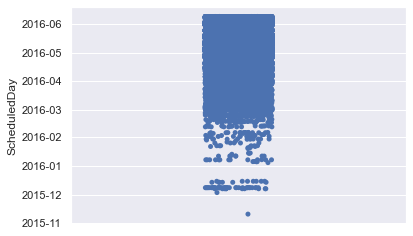

In [417]:
sns.stripplot(data = df, y = 'ScheduledDay', jitter = True)

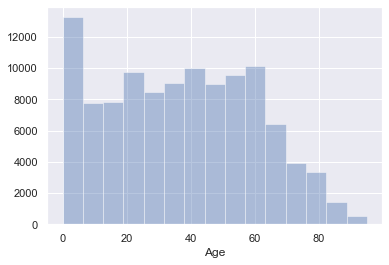

In [418]:
g = sns.distplot(df['Age'], kde=False, bins=15)
plt.show()

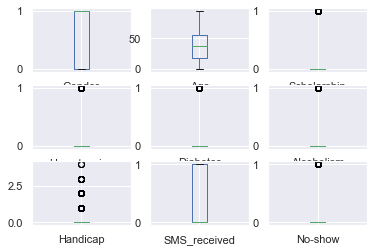

In [419]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

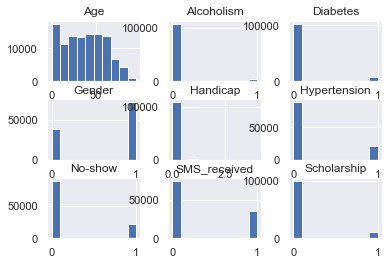

In [420]:
df.hist()
pyplot.show()

# Train the Model

The Bayes' Theorem is one of the first and most important theorems in Probability and Statistics. It is very popular because it is easy to implement and it also work well with numerical and categorical data and Gaussian Naïve Bayes, which this model will be based on.


This machine learning model will be built based on Bayes’ theorem that consider hypothesis such as different possible diagnosis of a patient, to make assumptions in regard to a question for example whether a patient will show up to an appointment. So in this case, the theorem explain  that we try to get to know a “probability of the causes given the effects ” and that “a probability is not a frequency but a subjective degree of belief” (Domingos, 2015, p.146) 

A Nave Bayes is a classifier in which the results are independent of the cause and that’s a naïve hypothesis.

So in this case, how probable is a patient is to show up based on the given features: 'Gender','Alcoholism','Diabetes', 'Hypertension' ,'SMS_received'… 

The way it works is taking the probability of each given feature: p(Gender|Alcoholism|Diabetes|Hypertention and so forth.

Formula: P(A|B) = P(A) P(B|A) / P(B)

The probability that an event B will occur with the information that an event A has already occurred is known as the conditional probability. This probability is denoted by the notation P(B|A), which stands for the probability of B given A. The conditional probability of event B given event A in the case where events A and B are independent.


First step to star building the model is to chose the columns (features) we will use to train the model

Then we will divide the data into 'training data' and 'test data'

In [422]:
prediction_variables = ['Gender','Age','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']

We'll build the x and y variables by extracting them from the dataset and splitting the data into training and test sets with scikit-train test split learn's feature.


The test data will select 20% of random data from our data set for testing.

In [423]:
train, test = train_test_split(df, test_size = 0.20, random_state=1)

We will divide our data into data for trainig('x' values) and output('y' values)

In [424]:
X_train = train[prediction_variables]
y_train = train['No-show']

X_test = test[prediction_variables]
y_test = test['No-show']

# Compare Model accuracy (KNN VS Naïve Bayes) 


In [425]:
models = [] 

models.append(('KNN', KNeighborsClassifier())) 
models.append(('NB', GaussianNB())) 

results = []
names = []

In [426]:
for name, model in models:     
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)     
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')     
    results.append(cv_results)     
    names.append(name)     
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.766123 (0.006670)
NB: 0.790109 (0.001809)


Visualize the comparison between KNN and NB

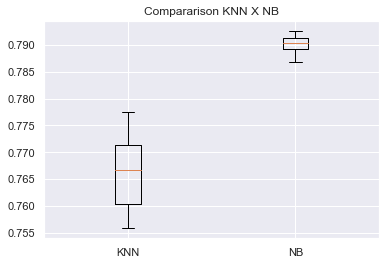

In [427]:
pyplot.boxplot(results, labels = names)
pyplot.title("Compararison KNN X NB")
pyplot.show()

After comparing KNN and Naive Bayes, we can see that NB accuracy output is higher than NB. So will use KNN to make the predication. 

I will use the above-mentioned x train and y train to train our naive Bayes classifier model. The fit approach is used, and the parameters are passed as shown below.

In [428]:
model = GaussianNB()
model.fit(X_train, y_train )

GaussianNB()

The model is now able to make predictions after it has been conditioned. To get the performance y_pred, we can use the predict method on the model and pass X_test as a parameter.

In [429]:
y_pred = model.predict(X_test[:10])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

The output of the prediction is an array of real numbers 

The confusion_matrix method

This matrix summarizes the classification problem's prediction performance. The number of accurate and incorrect predictions is broken down by class and summarized with count values.

In [434]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[17290   400]
 [ 4210   196]]


We must test our model on the test data to see how well it performs. To do so, we assess our model by determining the model's accuracy value.

In [435]:
y_pred = gnb.predict(X_test)
print("The accuracy is:",metrics.accuracy_score(y_test, y_pred))

The accuracy is: 0.7913649529326575


Naive Bayes Classifier has 79.1% accuracy with this specific test set.

In [436]:
X_test[:10]

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
88504,1,8,0,0,0,0,0,0
62509,0,19,0,0,0,0,0,1
101579,1,1,0,0,0,0,0,1
38551,1,17,0,0,0,0,0,0
37549,1,75,0,1,1,0,0,0
98075,0,3,0,0,0,0,0,0
59012,1,68,0,1,1,0,0,1
38426,1,63,0,1,1,0,0,1
54054,0,10,0,0,0,0,0,0
10068,1,25,0,0,0,0,0,1


In [437]:
y_test[:10]

88504     0
62509     0
101579    0
38551     0
37549     0
98075     0
59012     0
38426     0
54054     1
10068     1
Name: No-show, dtype: int64

In [438]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [439]:
model.predict_proba(X_test[:10])

array([[0.79881206, 0.20118794],
       [0.65880384, 0.34119616],
       [0.6518747 , 0.3481253 ],
       [0.80041117, 0.19958883],
       [0.96750231, 0.03249769],
       [0.80269298, 0.19730702],
       [0.92619648, 0.07380352],
       [0.92134026, 0.07865974],
       [0.80232972, 0.19767028],
       [0.65853571, 0.34146429]])

 Encoding categoric data on No-Show to make the viszualization of Show up and No show.

In [546]:
pred_prob = model.predict(X_test) 
pred_class  = np.where(pred_prob >0.5, "Yes", "No")
predictions = pd.DataFrame(pred_class, columns=['Noshow']
my_new_df = pd.concat([df, predictions], axis =1)

SyntaxError: invalid syntax (<ipython-input-546-ae719f3ea52e>, line 4)

In [547]:
 my_new_df.head(100)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Noshow
0,1.0,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0,No
1,0.0,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0,No
2,1.0,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0,No
3,1.0,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0,No
4,1.0,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,2016-04-29 10:28:54,2016-04-29,1.0,BONFIM,0.0,0.0,0.0,0.0,0.0,0.0,0,No
96,0.0,2016-04-26 14:28:39,2016-04-29,3.0,BONFIM,0.0,0.0,0.0,0.0,0.0,1.0,0,No
97,1.0,2016-04-11 09:00:00,2016-04-29,35.0,BONFIM,0.0,0.0,0.0,0.0,0.0,1.0,0,No
98,1.0,2016-04-12 09:44:42,2016-04-29,51.0,BONFIM,0.0,0.0,0.0,0.0,0.0,1.0,0,No


Visualization of the prediction model

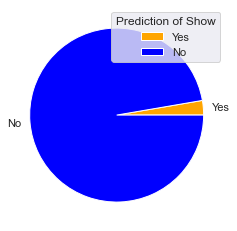

In [457]:
import matplotlib.pyplot as pt 
data =  my_new_df

x = len(data[data.Noshow == 'Yes'])
x1= len(data[data.Noshow == 'No']) 


pt.pie([x,x1], colors =["orange", "blue"], labels = [ "Yes", "No" ])
pt.legend(title = "Prediction of Show")
pt.show()

Check NaN values for No-show and drop NaN

In [541]:
print('No-show:', my_new_df.Noshow.unique())

No-show: ['No' 'Yes']


In [542]:
my_new_df.dropna(subset = ["No-show"], inplace=True) 

In [540]:
print('Noshow:', my_new_df.Noshow.unique())

Noshow: ['No' 'Yes']


In [505]:
my_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22089 entries, 0 to 22095
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          22089 non-null  float64       
 1   ScheduledDay    22089 non-null  datetime64[ns]
 2   AppointmentDay  22089 non-null  datetime64[ns]
 3   Age             22089 non-null  float64       
 4   Neighbourhood   22089 non-null  object        
 5   Scholarship     22089 non-null  float64       
 6   Hypertension    22089 non-null  float64       
 7   Diabetes        22089 non-null  float64       
 8   Alcoholism      22089 non-null  float64       
 9   Handicap        22089 non-null  float64       
 10  SMS_received    22089 non-null  float64       
 11  No-show         22089 non-null  int64         
 12  Noshow          22089 non-null  object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(2)
memory usage: 2.4+ MB


Change the No-Show data type to int from float 

In [506]:
my_new_df['No-show'] = my_new_df['No-show'].apply(np.int64)

We can see here that based on the prediction 4.405 is likly to show 

In [513]:
no_show = my_new_df["No-show"].value_counts()
print(no_show)

0    17684
1     4405
Name: No-show, dtype: int64


Check the probability of the patient to show based on the 'Gender','Alcoholism','Diabetes', 'Hypertension','SMS_received'.

In [539]:
no_show = ['Gender','Alcoholism','Diabetes', 'Hypertension','SMS_received']
for r in no_show :
    print(my_new_df.groupby(r)['No-show'].mean())

Gender
0.0    0.194670
1.0    0.202255
Name: No-show, dtype: float64
Alcoholism
0.0    0.201245
1.0    0.162500
Name: No-show, dtype: float64
Diabetes
0.0    0.200950
1.0    0.177609
Name: No-show, dtype: float64
Hypertension
0.0    0.206114
1.0    0.170877
Name: No-show, dtype: float64
SMS_received
0.0    0.165115
1.0    0.275918
Name: No-show, dtype: float64


As a result we can see that gender does not impact much wheather the person show up or not to an appointment, however the other conditions seems to have an affect. For instance a person who received SMS is more like to show up than the person who did not.

# Reference

Domingos, P. (2015) The Master Algorith. New York: Basic Books.

Kirk, M. (2017) Thoughtful Machine Learning with Python.USA: O'Reilly Media.
